# HW #3 - Supervised Learning

## Common Imports

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

## Dataload

In [47]:
import requests
import io
# # Load your dataset
url = 'https://raw.githubusercontent.com/wortcook/UMKC/refs/heads/main/Fall2024/CS5530-0005/hw2/diamonds_casestudy.csv'
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
df.head()

,carat,cut,color,clarity,depth,table,price,width,length,height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1. Data Cleaning
Determine missing values

In [48]:
#Check for na data
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth      50
table       0
price       0
width       0
length      0
height      0
dtype: int64

Because there are only 50 missing values, we'll drop them

In [49]:
#drop missing data
df.dropna(inplace=True)
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
width      0
length     0
height     0
dtype: int64

## 2. Data Exploration
Drop the columns we are not interested in and pairplot to get a visualization.


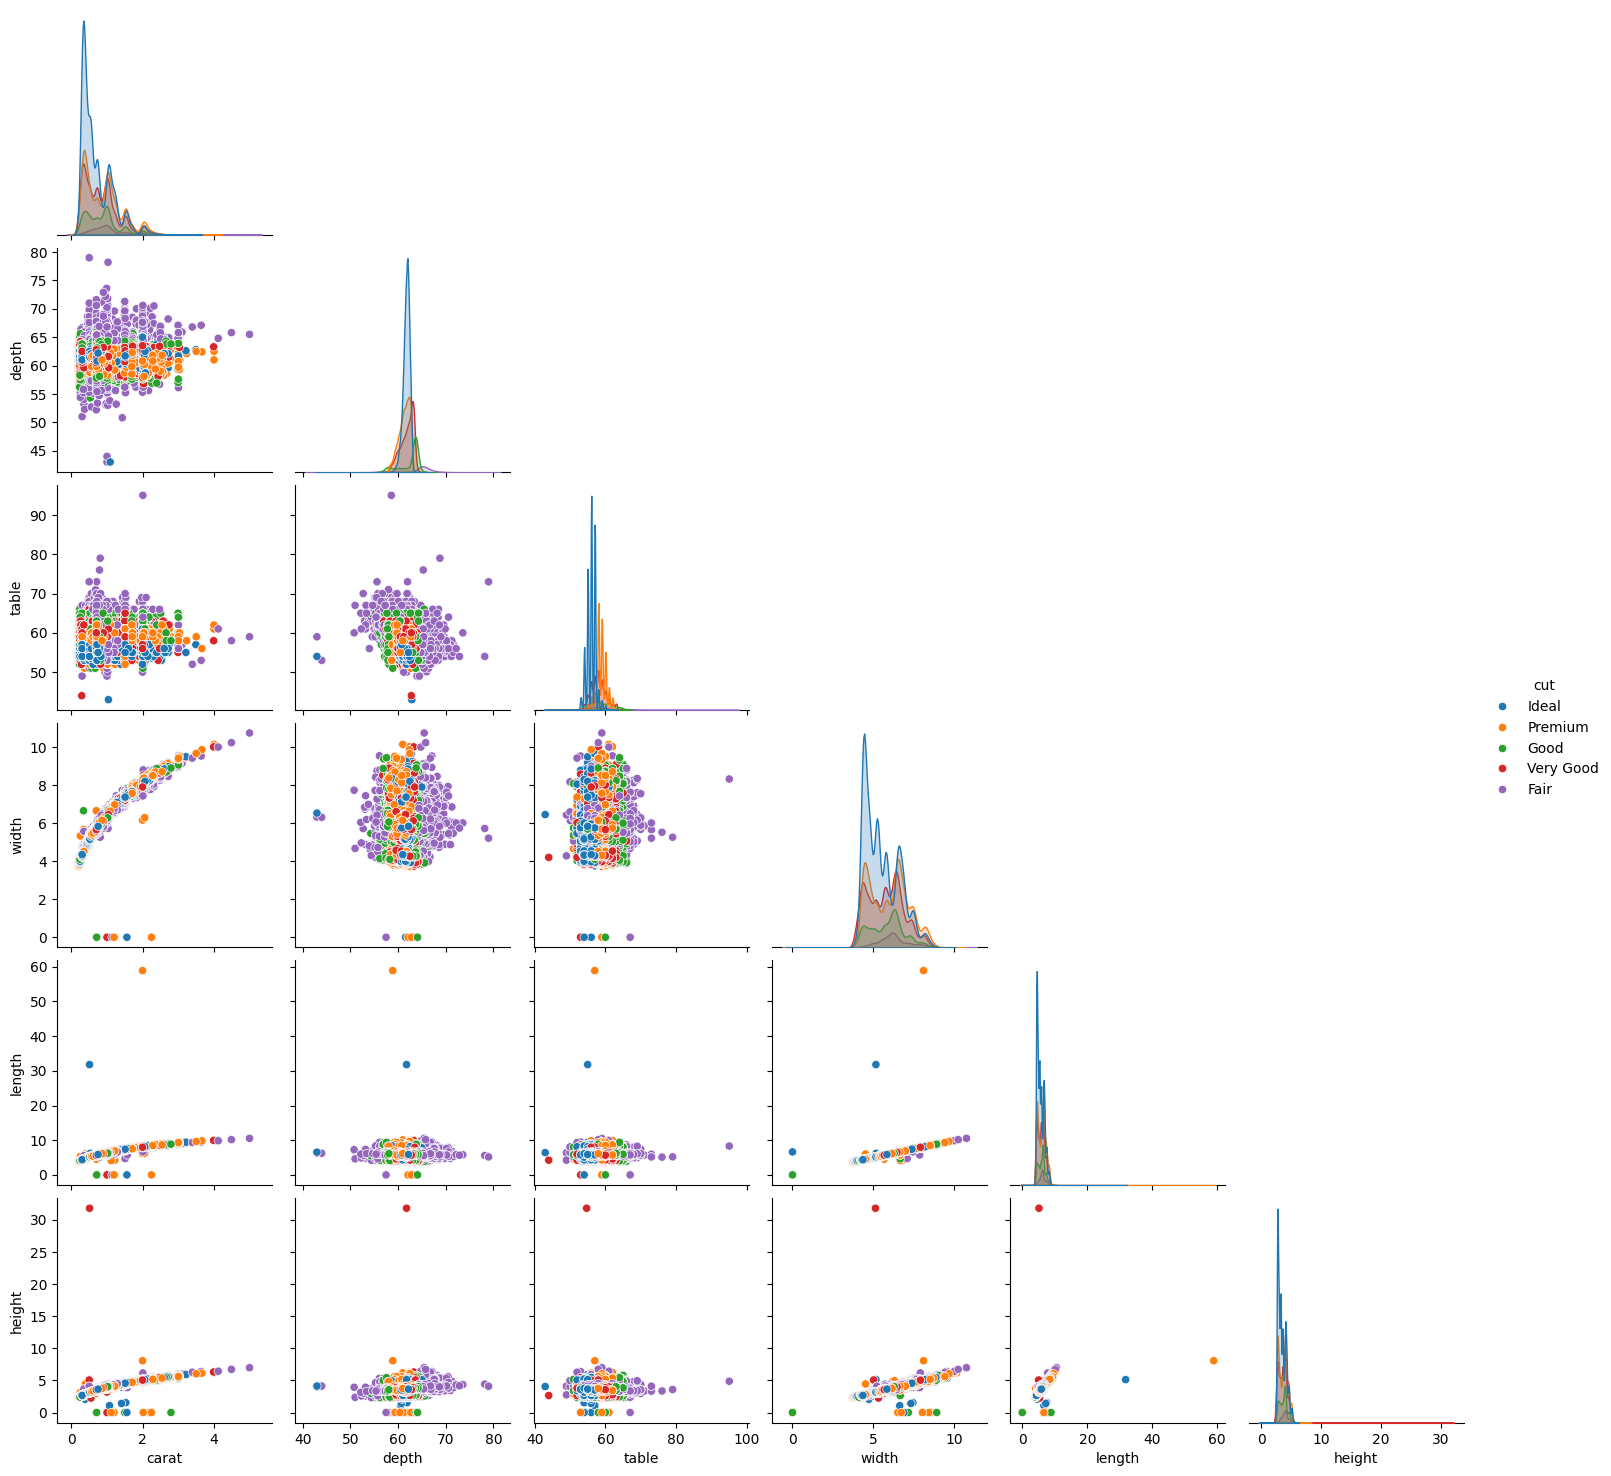

In [50]:

#Get a visualization of the different scatters across the different
#pairs of data
df = df.drop(['color', 'clarity', 'price'], axis=1)

sns.pairplot(df, hue='cut', corner=True)
plt.show()



## 3. Create the test-train data split so we can compare results

In [51]:
#Scale the data
scaler = StandardScaler()

#drop the category columns before we scale as well a price (we don't use price)
df_scaled = scaler.fit_transform(df.drop(['cut'], axis=1))
df_scaled = pd.DataFrame(df_scaled)

df_cut = df['cut']

#Create test and train data, using 80/20
data_train, data_test, cut_train, cut_test = train_test_split(df_scaled, df_cut, test_size=0.2, random_state=42)

## KNN Analysis

Accuracy:  0.7334384858044164
Confusion Matrix: 
 [[ 273   63    5    7    2]
 [  24  582   24  129  203]
 [   1    6 3998  223  121]
 [   0   27  309 2179  215]
 [   1  157  587  769  873]]

Classification Report: 
               precision    recall  f1-score   support

        Fair       0.91      0.78      0.84       350
        Good       0.70      0.60      0.65       962
       Ideal       0.81      0.92      0.86      4349
     Premium       0.66      0.80      0.72      2730
   Very Good       0.62      0.37      0.46      2387

    accuracy                           0.73     10778
   macro avg       0.74      0.69      0.71     10778
weighted avg       0.72      0.73      0.72     10778



<Axes: >

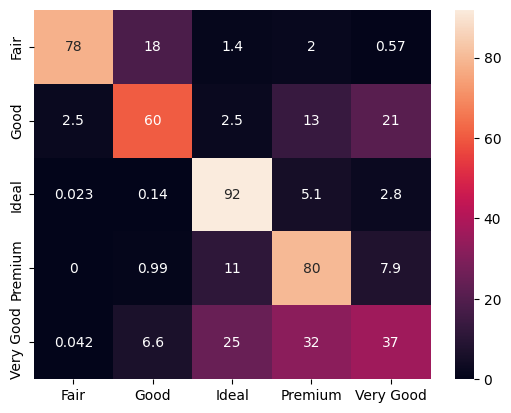

In [52]:
#KNN analysis
from sklearn.neighbors import KNeighborsClassifier

# Evaluation across multiple values to identify the best k
# accuracies = []
# for k in range(3, 30, 2):
#   print('*********************************')
#   print('k = ', k)
#   # create, train, and test, the KNN classifier
#   knn_classifier = KNeighborsClassifier(n_neighbors=k)
#   knn_classifier.fit(data_train, cut_train)
#   knn_predictions = knn_classifier.predict(data_test)

#   #evaluate and short test results
#   knn_accuracty = metrics.accuracy_score(cut_test, knn_predictions)

#   knn_confusion = metrics.confusion_matrix(cut_test, knn_predictions)
#   print('Accuracy: ', knn_accuracty)
#   print('Confusion Matrix: \n', knn_confusion)
#   print()
#   print('Classification Report: \n',metrics.classification_report(cut_test, knn_predictions))
#   print('*********************************')
#   print()
#   accuracies.append(knn_accuracty)

# #Plot the accuracies
# plt.plot(range(3, 30, 2), accuracies)
# plt.xlabel('k')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs. k')
# plt.show()

#Best k from the above analysis is 15
knn_classifier = KNeighborsClassifier(n_neighbors=15)
knn_classifier.fit(data_train, cut_train)
knn_predictions = knn_classifier.predict(data_test)

#evaluate and short test results
knn_accuracty = metrics.accuracy_score(cut_test, knn_predictions)
knn_confusion = metrics.confusion_matrix(cut_test, knn_predictions)
knn_confusion_normalized = metrics.confusion_matrix(cut_test, knn_predictions, normalize='true')*100
knn_classification_report = metrics.classification_report(cut_test, knn_predictions, )


print('Accuracy: ', knn_accuracty)
print('Confusion Matrix: \n', knn_confusion)
print()
print('Classification Report: \n', knn_classification_report)

sns.heatmap(knn_confusion_normalized, annot=True, xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)



## Naive Bayes

Accuracy:  0.5938021896455743
Confusion Matrix: 
 [[ 126  193    5    4   22]
 [  67  197  137  165  396]
 [  19    4 3775  481   70]
 [  10   28  603 1796  293]
 [  22   82  927  850  506]]

Classification Report: 
               precision    recall  f1-score   support

        Fair       0.52      0.36      0.42       350
        Good       0.39      0.20      0.27       962
       Ideal       0.69      0.87      0.77      4349
     Premium       0.54      0.66      0.60      2730
   Very Good       0.39      0.21      0.28      2387

    accuracy                           0.59     10778
   macro avg       0.51      0.46      0.47     10778
weighted avg       0.56      0.59      0.56     10778



<Axes: >

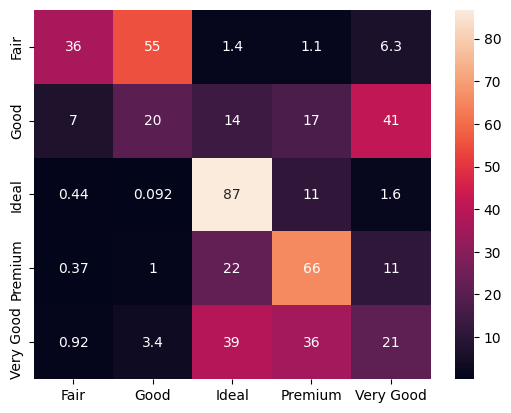

In [53]:
#Create the classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

#Fit the data
nb.fit(data_train, cut_train)

#predict the data
nb_cut_predictions = nb.predict(data_test)

#evaluate
nb_cut_accuracy = metrics.accuracy_score(cut_test, nb_cut_predictions)

nb_cut_confusion = metrics.confusion_matrix(cut_test, nb_cut_predictions)
nb_cut_confusion_normalized = metrics.confusion_matrix(cut_test, nb_cut_predictions, normalize='true')*100
np_cut_classification_report = metrics.classification_report(cut_test, nb_cut_predictions)

print('Accuracy: ', nb_cut_accuracy)
print('Confusion Matrix: \n', nb_cut_confusion)
print()
print('Classification Report: \n', np_cut_classification_report)


sns.heatmap(nb_cut_confusion_normalized, annot=True, xticklabels=nb.classes_, yticklabels=nb.classes_)





## Support Vector Machine

In [54]:
from sklearn.svm import SVC

### Linear

Accuracy:  0.673316014102802
Confusion Matrix: 
 [[ 197   31   32   65   25]
 [  40   45  248  196  433]
 [   1    0 3968   81  299]
 [   0    1  368 1872  489]
 [   0    5  966  241 1175]]
Classification Report: 
               precision    recall  f1-score   support

        Fair       0.83      0.56      0.67       350
        Good       0.55      0.05      0.09       962
       Ideal       0.71      0.91      0.80      4349
     Premium       0.76      0.69      0.72      2730
   Very Good       0.49      0.49      0.49      2387

    accuracy                           0.67     10778
   macro avg       0.67      0.54      0.55     10778
weighted avg       0.66      0.67      0.64     10778



<Axes: >

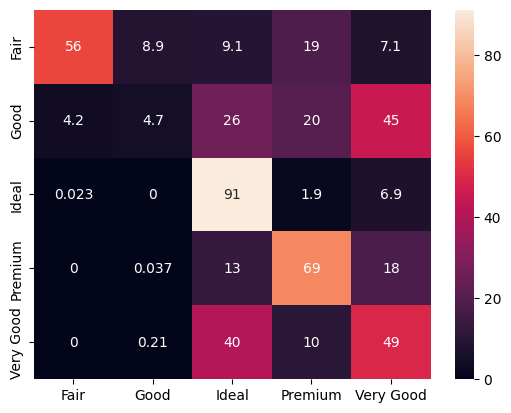

In [55]:
#SVN
# The following takes a long time to run, so I've commented it out
# C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

#This is a smaller set of C values which should run in collab
# UnComment to run
# C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
# log_C_values = np.log10(C_values)
# lc_accuracies = []
# for C in C_values:
#   linear_cut_model = SVC(kernel='linear', C=C) #create the model
#   linear_cut_model.fit(data_train, cut_train) #train the model
#   linear_cut_predictions = linear_cut_model.predict(data_test) #test the model

#   #Get metrics
#   linear_cut_accuracy = metrics.accuracy_score(cut_test, linear_cut_predictions)
#   cut_cm = metrics.confusion_matrix(cut_test, linear_cut_predictions)
#   cut_report = metrics.classification_report(cut_test, linear_cut_predictions)

#   #Print metrics
#   print('Accuracy: ', linear_cut_accuracy)
#   print('Confusion Matrix: \n', cut_cm)
#   print('Classification Report: \n', cut_report)
#   lc_accuracies.append(linear_cut_accuracy)

# #Plot the accuracies vs C values
# plt.plot(log_C_values, lc_accuracies)
# plt.xlabel('log(C)')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs. log(C)')
# plt.show()

#Using the best C value from the above analysis which was 10
linear_cut_model = SVC(kernel='linear', C=10) #create the model
linear_cut_model.fit(data_train, cut_train) #train the model
linear_cut_predictions = linear_cut_model.predict(data_test)

#Get metrics
linear_cut_accuracy = metrics.accuracy_score(cut_test, linear_cut_predictions)
cut_cm = metrics.confusion_matrix(cut_test, linear_cut_predictions)
cut_cm_normalized = metrics.confusion_matrix(cut_test, linear_cut_predictions, normalize='true')*100
cut_report = metrics.classification_report(cut_test, linear_cut_predictions)

#Print metrics
print('Accuracy: ', linear_cut_accuracy)
print('Confusion Matrix: \n', cut_cm)
print('Classification Report: \n', cut_report)

sns.heatmap(cut_cm_normalized, annot=True, xticklabels=linear_cut_model.classes_, yticklabels=linear_cut_model.classes_)



### Poly

Accuracy:  0.6401929857116349
Confusion Matrix: 
 [[ 190   92   46   14    8]
 [  13  246  325   82  296]
 [   1    2 4180  113   53]
 [   0   16  772 1771  171]
 [   0   72 1388  414  513]]
Classification Report: 
               precision    recall  f1-score   support

        Fair       0.93      0.54      0.69       350
        Good       0.57      0.26      0.35       962
       Ideal       0.62      0.96      0.76      4349
     Premium       0.74      0.65      0.69      2730
   Very Good       0.49      0.21      0.30      2387

    accuracy                           0.64     10778
   macro avg       0.67      0.52      0.56     10778
weighted avg       0.63      0.64      0.60     10778



<Axes: >

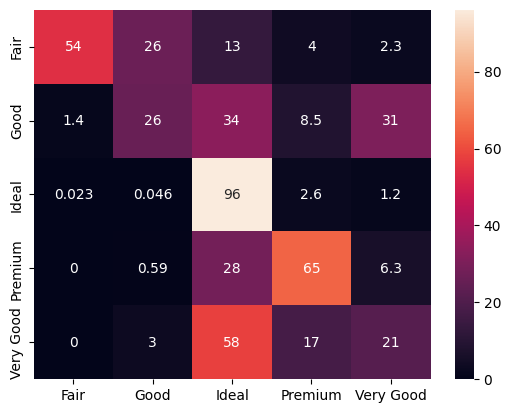

In [56]:
#Code used to evaluate the polynomial kernel
#Uncomment to run
# Note: C was not evaluated over a range of values, due to the time it takes to run
# pc_accuracies = []
# for degree in [2, 3, 4, 5, 6, 7, 8]:
#   cut_model = SVC(kernel='poly', C=1, degree=degree) #create the model
#   cut_model.fit(data_train, cut_train) #train the model
#   cut_predictions = cut_model.predict(data_test) #test the model

#   #Get metrics
#   cut_accuracy = metrics.accuracy_score(cut_test, cut_predictions)
#   cut_cm = metrics.confusion_matrix(cut_test, cut_predictions)
#   cut_report = metrics.classification_report(cut_test, cut_predictions)

#   #Print metrics
#   print('Accuracy: ', cut_accuracy)
#   print('Confusion Matrix: \n', cut_cm)
#   print('Classification Report: \n', cut_report)
#   pc_accuracies.append(cut_accuracy)

# #Plot the accuracies vs C values
# plt.plot([2, 3, 4, 5, 6, 7, 8], pc_accuracies)
# plt.xlabel('degree')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs. degree')
# plt.show()

#Best kernel from previous runs, using 3
cut_model = SVC(kernel='poly', C=1, degree=3) #create the model
cut_model.fit(data_train, cut_train) #train the model
cut_predictions = cut_model.predict(data_test) #test the model

#Get metrics
cut_accuracy = metrics.accuracy_score(cut_test, cut_predictions)
cut_cm = metrics.confusion_matrix(cut_test, cut_predictions)
cut_cm_normalized = metrics.confusion_matrix(cut_test, cut_predictions, normalize='true')*100
cut_report = metrics.classification_report(cut_test, cut_predictions)

#Print metrics
print('Accuracy: ', cut_accuracy)
print('Confusion Matrix: \n', cut_cm)
print('Classification Report: \n', cut_report)

sns.heatmap(cut_cm_normalized, annot=True, xticklabels=cut_model.classes_, yticklabels=cut_model.classes_)

### Radial

Accuracy:  0.7901280385971423
Confusion Matrix: 
 [[ 297   34    6    6    7]
 [  30  606   17   20  289]
 [   2    6 3991  140  210]
 [   4    4  319 2132  271]
 [   1  132  539  225 1490]]
Classification Report: 
               precision    recall  f1-score   support

        Fair       0.89      0.85      0.87       350
        Good       0.77      0.63      0.69       962
       Ideal       0.82      0.92      0.87      4349
     Premium       0.85      0.78      0.81      2730
   Very Good       0.66      0.62      0.64      2387

    accuracy                           0.79     10778
   macro avg       0.80      0.76      0.78     10778
weighted avg       0.79      0.79      0.79     10778



<Axes: >

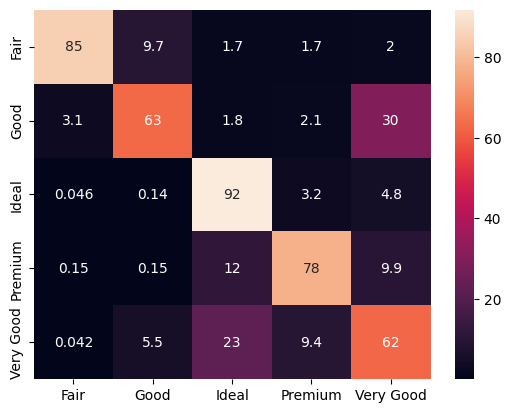

In [58]:
# Code used to evaluate the RBF kernel
# Uncomment to run
# rc_accuracies = []
# for C in C_values:
#   cut_model = SVC(kernel='poly', C=C) #create the model
#   cut_model.fit(data_train, cut_train) #train the model
#   cut_predictions = cut_model.predict(data_test) #test the model

#   #Get metrics
#   cut_accuracy = metrics.accuracy_score(cut_test, cut_predictions)
#   cut_cm = metrics.confusion_matrix(cut_test, cut_predictions)
#   cut_report = metrics.classification_report(cut_test, cut_predictions)

#   #Print metrics
#   print('Accuracy: ', cut_accuracy)
#   print('Confusion Matrix: \n', cut_cm)
#   print('Classification Report: \n', cut_report)
#   rc_accuracies.append(cut_accuracy)

# #Plot the accuracies vs C values
# plt.plot(log_C_values, rc_accuracies)
# plt.xlabel('log(C)')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs. log(C)')
# plt.show()

#Best kernel from previous runs, using 10,000
cut_model = SVC(kernel='rbf', C=10000) #create the model
cut_model.fit(data_train, cut_train) #train the model
cut_predictions = cut_model.predict(data_test) #test the model

#Get metrics
cut_accuracy = metrics.accuracy_score(cut_test, cut_predictions)
cut_cm = metrics.confusion_matrix(cut_test, cut_predictions)
cut_cm_normalized = metrics.confusion_matrix(cut_test, cut_predictions, normalize='true')*100
cut_cm_report = metrics.classification_report(cut_test, cut_predictions)

#Print metrics
print('Accuracy: ', cut_accuracy)
print('Confusion Matrix: \n', cut_cm)
print('Classification Report: \n', cut_cm_report)

sns.heatmap(cut_cm_normalized, annot=True, xticklabels=cut_model.classes_, yticklabels=cut_model.classes_)
